# Laboratory session 4
***

**Author:** Rinaldi Luca 

### Exercise 1
***

In [43]:
pH <- rep(1/6,6)
pH_hist <- matrix(pH, ncol=6)
E_hist <- c('-')
stay=TRUE

while (stay){
    dev.off(3)
    x11(height = 6,width = 11)
    par(mfrow=c(2,3))
    for (i in 0:5){
        plot(pH_hist[,i+1], col='red',pch = 19, xaxt='n',ylim=c(0,max(pH_hist)+0.05) ,ylab='Probability',xlab='',
             main=paste('H',i,' prob=',pH_hist[dim(pH_hist)[1],i+1],sep=''))
        axis(side=1,at = 1:length(E_hist),labels = E_hist)
    }
    k <- invisible(readline('Type b or w for black or white extraction respectively, type another key to exit'))
    if (k=='b'){
        pH <- pH *(5-c(0:5))/5
    }
    else if (k=='w'){
        pH <- pH *c(0:5)/5
    }
    else { stay <- FALSE }
    pH <- pH/sum(pH)
    pH_hist <- rbind(pH_hist,pH)
    E_hist <- append(E_hist,k)
}
dev.off(3)   

Type b or w for black or white extraction respectively, type another key to exitb
Type b or w for black or white extraction respectively, type another key to exitw
Type b or w for black or white extraction respectively, type another key to exitb
Type b or w for black or white extraction respectively, type another key to exitb
Type b or w for black or white extraction respectively, type another key to exitb
Type b or w for black or white extraction respectively, type another key to exitw
Type b or w for black or white extraction respectively, type another key to exitk


png 
  2

### Exercise 2
***

The box from which we were extracting was: H2

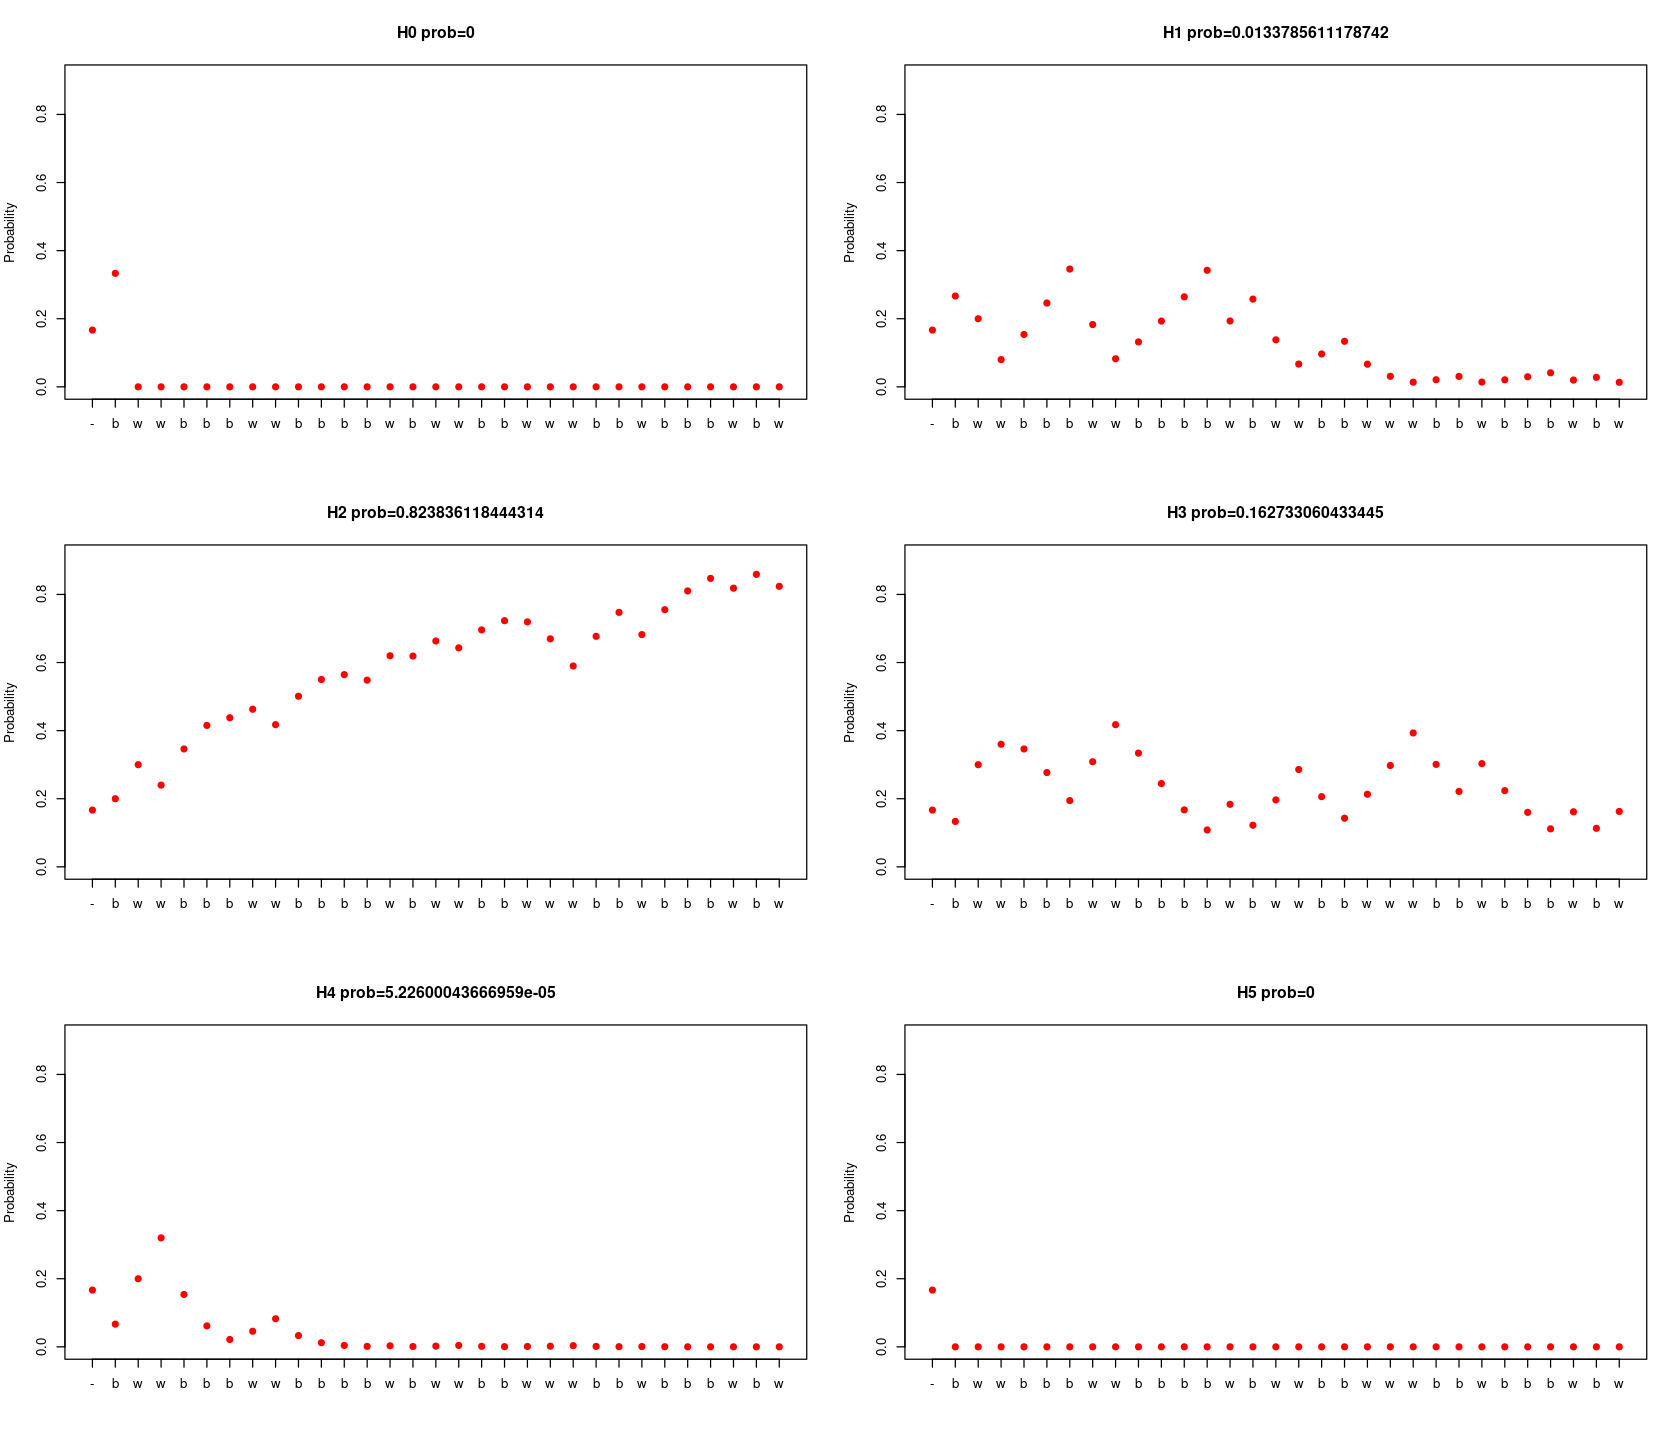

In [4]:
set.seed(123)
box_ix <- sample(0:5,1)
box_content <- append(rep('w',box_ix),rep('b',5-box_ix))

N_trial <- 30
extract_seq <- append('-',sample(box_content,N_trial,replace=T))
pH <- matrix(0, ncol=6, nrow=N_trial+1)
pH[1,] <- rep(1/6,6)

for (k in 2:(N_trial+1)){
    if (extract_seq[k]=='b'){
        pH[k,] <- pH[k-1,] *(5-c(0:5))/5
    }
    else if (extract_seq[k]=='w'){
        pH[k,] <- pH[k-1,] *c(0:5)/5
    }
    pH[k,] <- pH[k,]/sum(pH[k,])
}
par(mfrow=c(3,2))
options(repr.plot.width=14, repr.plot.height=12)
for (i in 0:5){
        plot(pH[,i+1], col='red',pch = 19, xaxt='n',ylim=c(0,max(pH)+0.05) ,ylab='Probability',xlab='',
             main=paste('H',i,' prob=',pH[dim(pH)[1],i+1],sep=''))
        axis(side=1,at = 1:length(extract_seq),labels = extract_seq)
    }
cat('The box from which we were extracting was: H',box_ix, sep='')

### Exercise 3
***
Given a sequence of independent random variable $X_j \sim \Gamma(\alpha_j,\beta)$:

$$
Y = \sum_{j=1}^{n} X_j \rightarrow Y \sim \Gamma(\alpha,\beta)
$$
with
$$
\alpha = \sum_{j=1}^{n} \alpha_j
$$

If $\alpha=m$ is an integer, a random variable from gamma distribution $\Gamma(m,\beta)$ (Erlang distribution) can be obtained by summing $m$ independent exponential random variables $X_j \sim e^{\beta}$:

$$
Y = \frac{\sum_{j=1}^{m} (-\ln U_j)}{\beta} = - \frac{\ln \prod_{j=1}^{m} U_j}{\beta}
$$

In [1]:
?hist

In [2]:
erlang <- function(n,m,beta){
    Y <- rep(NULL,n)
    for (i in 1:n){
        x <- runif(m)
        Y[i] <- -log(prod(x))/beta 
    }
    return(Y)
}

n <- 10000 
m <- 20 
beta <- 2

x_erl <- erlang(n,m,beta)

x_gam <- rgamma(n,shape=m,rate=beta)

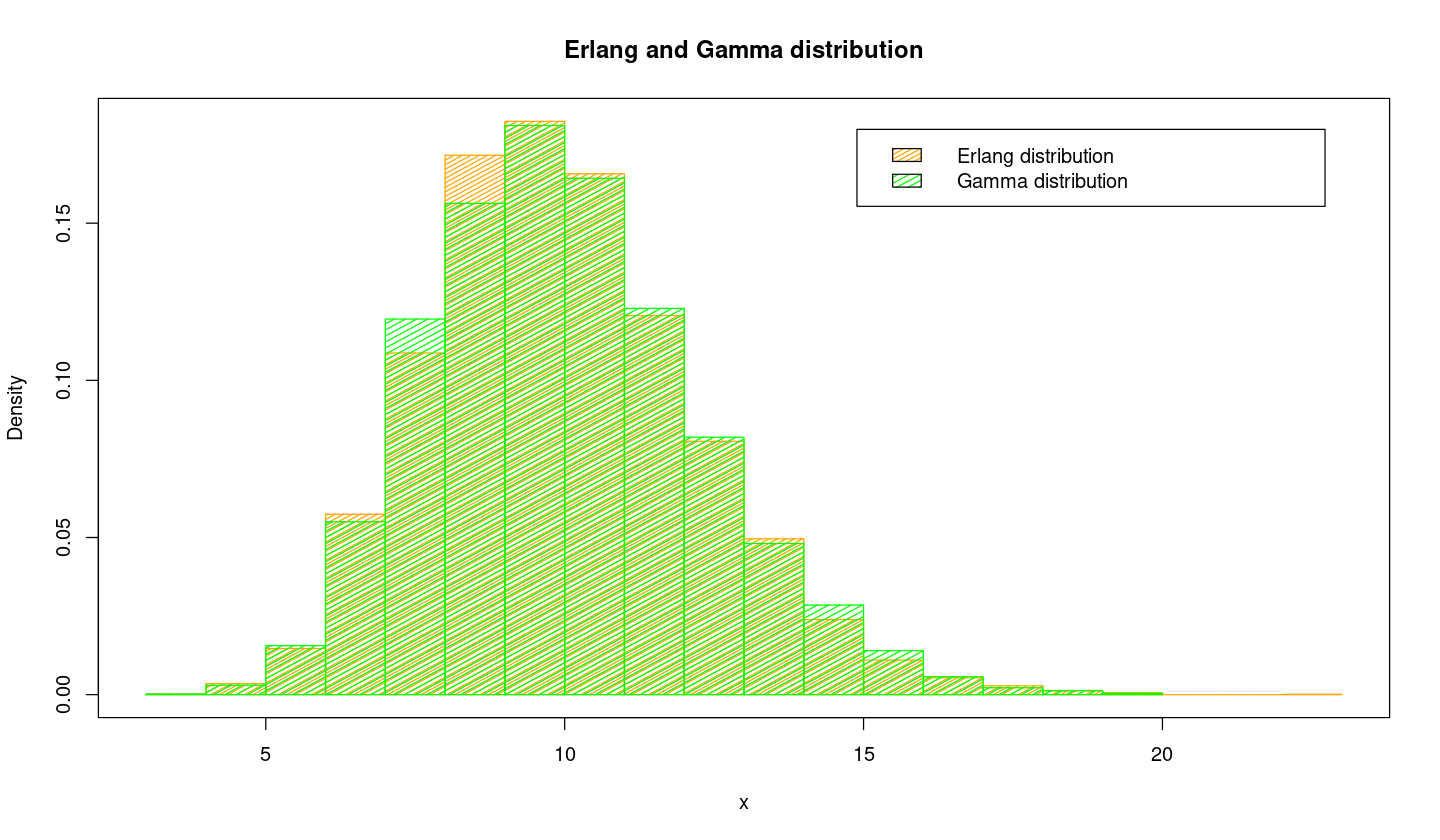

In [18]:
options(repr.plot.width=12, repr.plot.height=7)
hist(x_erl, density = 40, col = 'orange', main = 'Erlang and Gamma distribution', 
     ylab='Density', xlab='x',probability=T)
hist(x_gam, density = 30, col = 'green', main = 'Erlang and Gamma distribution',probability=T,add=T)
legend("topright", inset=0.05,legend=c("Erlang distribution","Gamma distribution"),
       density=c(40,30), cex=1,
       fill=c('orange','green'))
box()

### Exercise 4
***

In [90]:
mid_sq <- function(n, seed){
    x  <- rep(NULL,n)
    digits <- length(unlist(strsplit(as.character(seed),'')))
    x_s    <- unlist(strsplit(as.character(seed*seed),'')) 
    dig_2 <- length(unlist(strsplit(as.character(seed*seed),'')))
    x[1]   <- as.numeric(paste(x_s[((dig_2 - digits)%/%2):(digits + (dig_2 - digits)%/%2)], collapse='' ))
    for (i in 2:n){
        x_s    <- unlist(strsplit(as.character(x[i-1]*x[i-1]),'')) 
        dig_2 <- length(unlist(strsplit(as.character(x[i-1]*x[i-1]),'')))
        x[i]   <- as.numeric(paste(x_s[((dig_2 - digits)%/%2):(digits + (dig_2 - digits)%/%2)], collapse='' ))
        if (x[i]==seed){
            cat('Warning, loop encountered')
            break
        }
    }
    return(x)
}

In [101]:
mid_sq(20,23518)

[1] 530963 192170 929308 361335  56298 169464 718047 559149 264760  97857
[11] 575992 176678 215115 274463 329938 885908 483298 357695 794571 134307

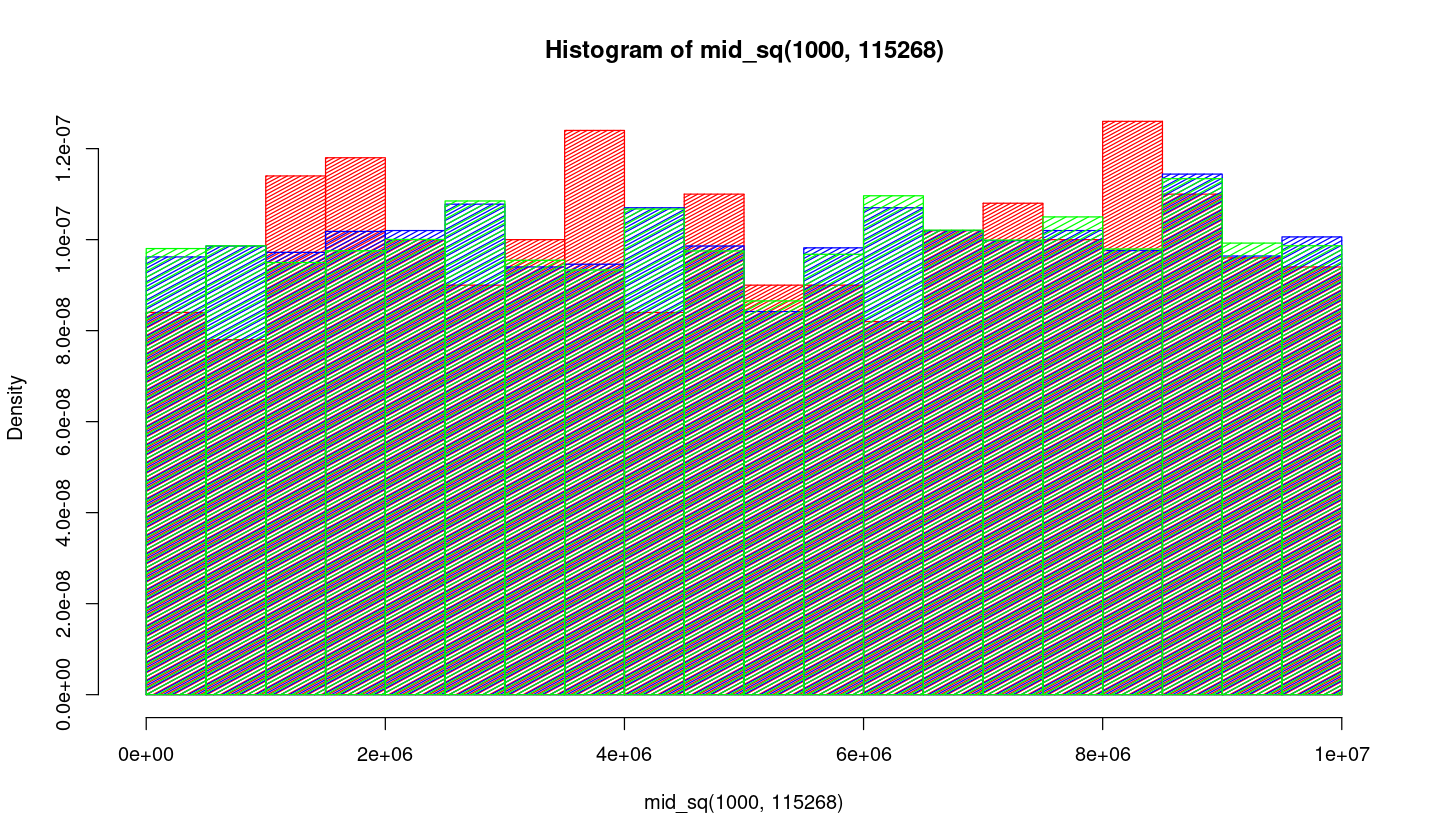

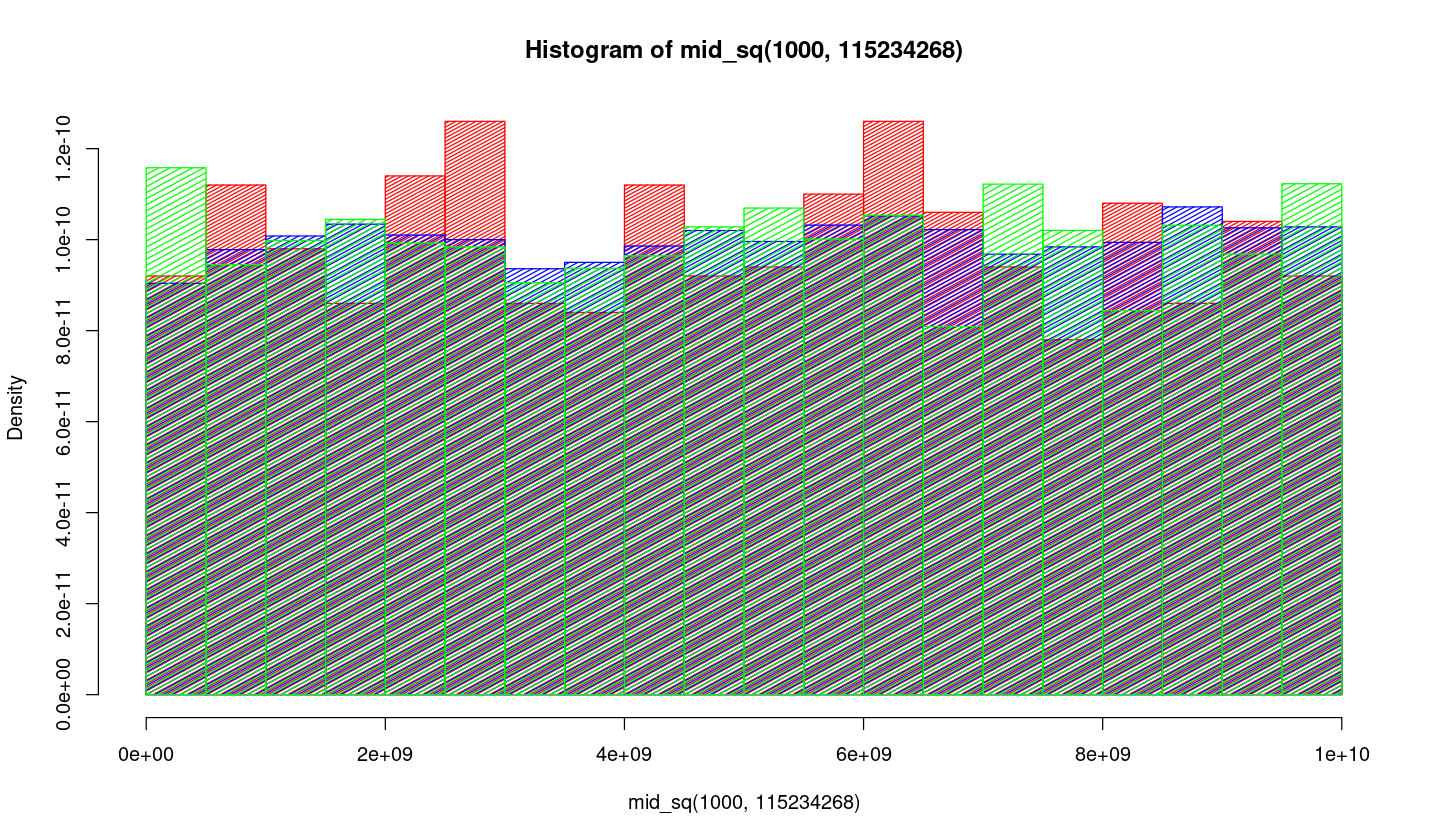

In [106]:
hist(mid_sq(1000,115268), probability = T, breaks=20, density=50, col='red')
hist(mid_sq(10000,115268), probability = T, breaks=20, add=T, density=40, col='blue')
hist(mid_sq(100000,115268), probability = T, breaks=20, add=T, density=30, col='green')

hist(mid_sq(1000,115234268), probability = T, breaks=20, density=50, col='red')
hist(mid_sq(10000,115234268), probability = T, breaks=20, add=T, density=40, col='blue')
hist(mid_sq(100000,115234268), probability = T, breaks=20, add=T, density=30, col='green')